<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 1</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 18. April, 2016 vor der Vorlesung

**Name**: <font color="red">Bitte geben Sie ihren Namen an</font>

**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Gumowski-Mira Attraktor</td>
<td style="border-style: none; width: 1%; text-align: right">(5 Punkte)</td></tr></table>

Wir betrachten ein **dynamisches System**, das einen zeitabhängigen Prozess beschreibt, dessen Entwicklung lediglich von der Wahl des Anfangszustands abhängt. Zu welchem Zeitpunkt der Prozess gestartet wird, ist jedoch unerheblich. Alle möglichen Zustände spannen den **Phasenraum** auf. Ein **Attraktor** ist eine Untermenge von Zuständen, die im Laufe der Zeit vom System angenommen werden. 

Wir betrachten ein Modell, dessen Phasenraum zweidimensional ist mit Koordinaten $(x, y)$. Außerdem besitzt das Modell drei Parameter $a, b, c$. Die Zeitentwicklung geschieht gemäß des folgenden Gesetz:

$\quad x_{n + 1} = y_n + a\cdot (1 + b\cdot y_n^2)\cdot y_n + f(x_n)$

$\quad y_{n + 1} = - x_n + f(x_{n + 1})$

Die Funktion $f(x)$ is gegeben durch

$\quad f(x) = c\cdot x + \dfrac{2\cdot(1 - c)\cdot x^2}{1 + x^2}$

Dieses Modell ist unter dem Namen **Gumowski-Mira Attraktor** bekannt.

Das untenstehende Programm berechnet eine Trajektorie und speichert sie in einer Matrix, die dann als Bild visualisiert werden kann. Kommentieren Sie den Codeausschnitt in dem durch den Kommentar *###...* gekennzeichneten Bereich.

In [1]:
using PyPlot
pygui(false); # switch between inline display and external window

function gumowski_mira(x, y, a, b, c, min_x, max_x, min_y, max_y, image, N)
    # set image size
    width = size(image)[2]
    height = size(image)[1]
    
    # define the local function f(x), using the parameter c as a constant
    # f(x) is only defined in the function gumowski_mira
    # outside of this function f(x) is not defined
    # so that f(x) on the outside is not touched if it is defined there
    f(x) = c * x + 2.0 * (1.0 - c) * x * x / (1.0 + x * x)
    
    for i in 1:N
        # calculate new x and y, using parameter a, b and f(x)
        new_x = y + a * (1. + b * y^2) * y + f(x)
        new_y = - x + f(new_x)
        
        # set x and y to the new variables
        x, y = new_x, new_y
        
        im_x = Int(ceil((x - min_x) / (max_x - min_x) * width))
        im_y = Int(ceil((y - min_y) / (max_y - min_y) * height))
        
        image[max(1, im_y - 1):min(height, im_y + 1), max(1, im_x - 1):min(width, im_x + 1)] += 1
    end
    # at the end of the function the last value used is returned
    # if there is no 'return'-line
    # but in this case nothing is returned because no value / variable is used in the end
    return image
end

gumowski_mira (generic function with 1 method)

Wir initialisieren nun eine Matrix der Größe $1200\times 1200$, die das Bild darstellen wird. Erweitern Sie den folgenden Codeausschnitt in den angegebenen Bereichen, um so die Funktion *gumowski_mira* mit den Parametern
$a = 0.026, b=-0.034, c=-0.802095$ aufzurufen. Benutzen Sie $(x_0, y_0) = (0.1, 0.1)$ als initiale Koordinate und plotten Sie die Trajektorie für $N = 1.000.000$ Iterationsschritte im Bereich $(x, y) \in (-18, 22)\times (-14, 12)$.

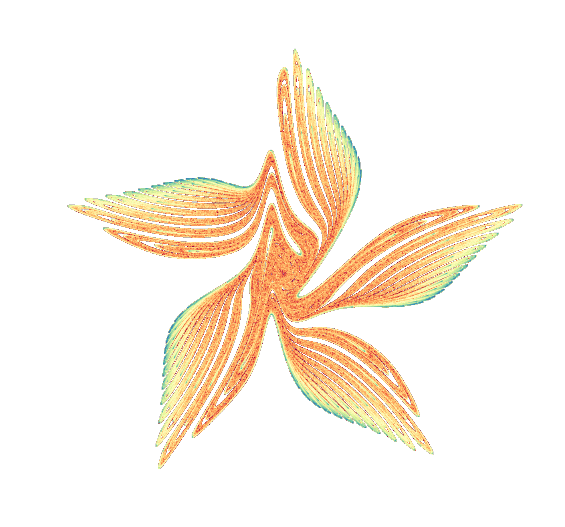

(-0.5,1199.5,1199.5,-0.5)

In [2]:
image = zeros(1200, 1200)

image = gumowski_mira(0.1, 0.1, 0.026, -0.034, -0.802095, -18, 22, -14, 12, image, 1000000)

imshow(log(image), cmap="Spectral")
axis("off")

Für das zweite Bild muss die Matrix neu initialisiert werden. Die Parameter lauten nun
$a = -0.05, b=0.005, c=-0.495$ aufzurufen. Benutzen Sie $(x_0, y_0) = (0.085, 0.085)$ als initiale Koordinate und plotten Sie die Trajektorie für $N = 1.000.000$ Iterationsschritte im Bereich $(x, y) \in (-12, 16)\times (-15, 8)$.

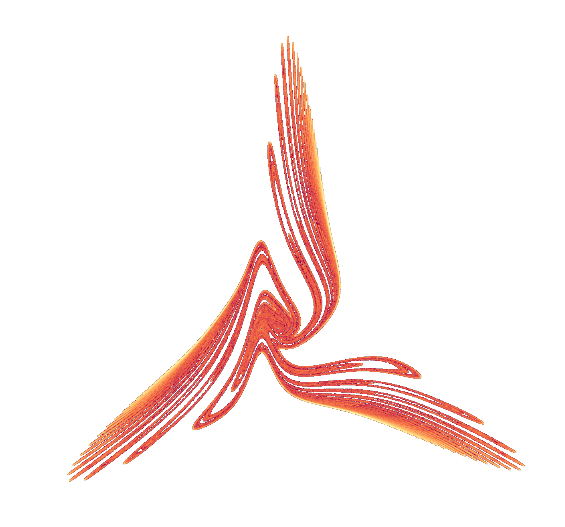

(-0.5,1199.5,1199.5,-0.5)

In [3]:
image = zeros(1200, 1200)

image = gumowski_mira(0.085, 0.085, -0.05, 0.005, -0.495, -12, 16, -15, 8, image, 1000000)

imshow(log(image), cmap="Spectral")
axis("off")